# Reanalysis of data from Veillard & Vincent (2020)

Veillard & Vincent (2020) tested the hypothesis that discount rates moderated the rate of weight gain with age. This was done with a Bayesian linear regression with a main effect of age and an interaction term on `age` and `discount rate`. A main effect of `discount rate` was ommited from their model because a simple main effects model indicated no main effect of `discount rate`. This was perhaps a bit of a mistake.

Here we conduct a similar Bayesian analysis, but we include a main effect of `age` and `discount rate` and the interaction `age * discount rate`. We will see that this results in a very different interpretation of the same data.

In [1]:
# Install Black autoformatter with: pip install nb-black
%load_ext lab_black

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [4]:
import sys

sys.path.insert(0, "../analysis/")

from bayesian_moderation import BayesianModeration

figsize = (8, 12)

BMI_prior = {
    "β0μ": 12,
    "β0σ": 20,
    "β1μ": 0,
    "β1σ": 20,
    "β2μ": 0,
    "β2σ": 20,
    "β3μ": 0,
    "β3σ": 20,
    "σ": 1,
}

# define sampling options
SEED = 123
n_samples = 5_000
sample_options = {
    "tune": 2_000,
    "draws": n_samples,
    "chains": 6,
    "cores": 6,
    "nuts_kwargs": {"target_accept": 0.95},
    "random_seed": SEED,
}

## Load and process data

In [5]:
data = pd.read_csv("veillard_vincent_2020_data.csv")

# remove any rows full of missing values
data = data.dropna()

# Analysis #1 of Veillard & Vincent (2020) data
This section runs Bayesian main effects + interaction model on the data presented by Veillard & Vincent (2020)

## Analysis 1: `bmi ~ age + logk_money + age:logk_money`

In [6]:
bmi_age_money1 = BayesianModeration(
    y=data.bmi.values,
    x=data.age.values,
    m=data.logk_money.values,
    xlabel=r"Age [years]",
    ylabel="BMI [$kg/m^2$]",
    mlabel=r"$\ln(k_{money})$",
    prior=BMI_prior,
    sample_options=sample_options,
)

model = bmi_age_money1.model
trace = bmi_age_money1.trace

Prior parameters are:
{'β0μ': 12, 'β0σ': 20, 'β1μ': 0, 'β1σ': 20, 'β2μ': 0, 'β2σ': 20, 'β3μ': 0, 'β3σ': 20, 'σ': 1}


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (6 chains in 6 jobs)
NUTS: [σ, β3, β2, β1, β0]
Sampling 6 chains, 0 divergences: 100%|██████████| 42000/42000 [00:58<00:00, 722.55draws/s]
The number of effective samples is smaller than 25% for some parameters.


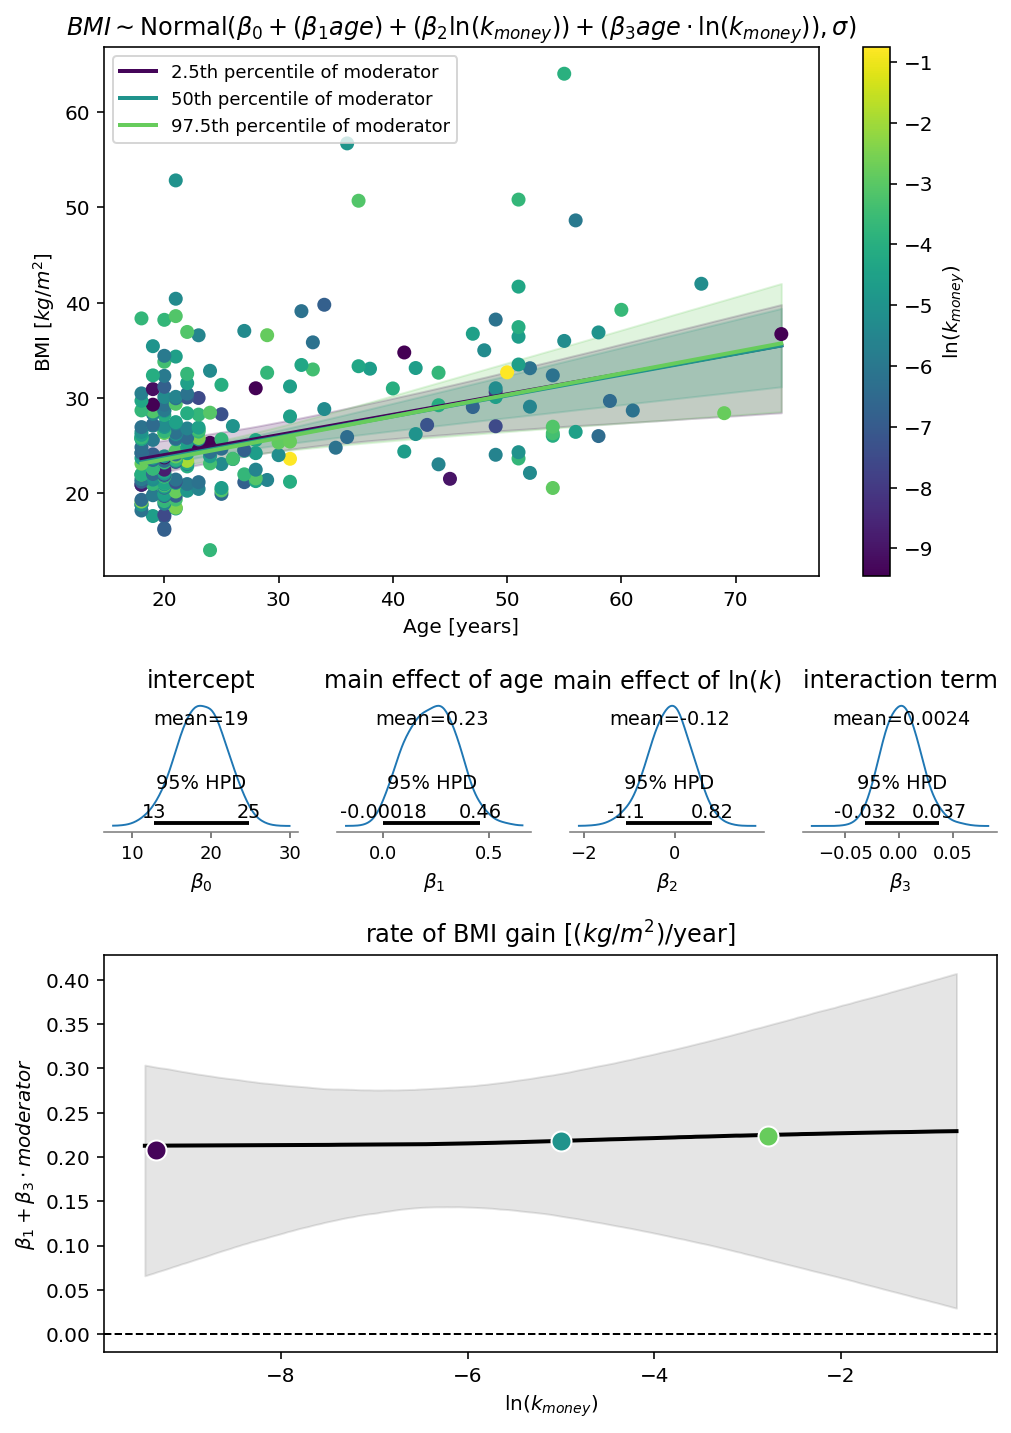

In [7]:
ax1, ax2, axb0, axb1, axb2, axb3 = bmi_age_money1.plot_multipanel(
    figsize=figsize, moderation_multiplier=1
)

# modifications to plot

ax1.set(
    title=r"$BMI \sim \mathrm{Normal}(\beta_0 + (\beta_1 age) + (\beta_2 \ln(k_{money})) + (\beta_3 age \cdot \ln(k_{money})), \sigma)$"
)

ax2.set(title="rate of BMI gain [$(kg/m^2)$/year]")

plt.savefig("veillard_vincent_reanalysis_money.pdf", bbox_inches="tight")
plt.savefig("veillard_vincent_reanalysis_money.png", bbox_inches="tight", dpi=300)

This result is very different from that presented in Veillard & Vincent (2020), see their Figure 4 in particular. In this new analysis we see that there is a main effect of age and discounting for money and the interaction term.

If we look at the posterior distributions over the $\beta$ parameters, we can see that these are all credibly non-zero.

This now leads us to a radically different interpretation of the same data - we can conclude that a) BMI increases with age, b) BMI increases as discount rate decreases, c) discount rates moderate the rate of BMI gain with age.

Again, this is evidence for the process model of Veillard & Vincent (2020) that people with higher levels of discounting will gain BMI with age, whereas those with the lowest level of discounting do not gain (much or any) weight with age.

## Analysis 2: `bmi ~ age + logk_weight + age:logk_weight`

We now conduct the reanalysis for discounting of weight loss rewards, as in Lim & Bruce (2015).

In [8]:
# for a, b, c in zip(data.bmi.values, data.age.values, data.logk_weight.values):
#     print(a, b, c)

In [9]:
bmi_age_weight1 = BayesianModeration(
    y=data.bmi,
    x=data.age,
    m=data.logk_weight,
    xlabel=r"Age [years]",
    ylabel="BMI [$kg/m^2$]",
    mlabel=r"$\ln(k_{weight})$",
    prior=BMI_prior,
    sample_options=sample_options,
)

model = bmi_age_weight1.model
trace = bmi_age_weight1.trace

Prior parameters are:
{'β0μ': 12, 'β0σ': 20, 'β1μ': 0, 'β1σ': 20, 'β2μ': 0, 'β2σ': 20, 'β3μ': 0, 'β3σ': 20, 'σ': 1}


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (6 chains in 6 jobs)
NUTS: [σ, β3, β2, β1, β0]
Sampling 6 chains, 0 divergences: 100%|██████████| 42000/42000 [00:46<00:00, 901.74draws/s] 
The number of effective samples is smaller than 25% for some parameters.


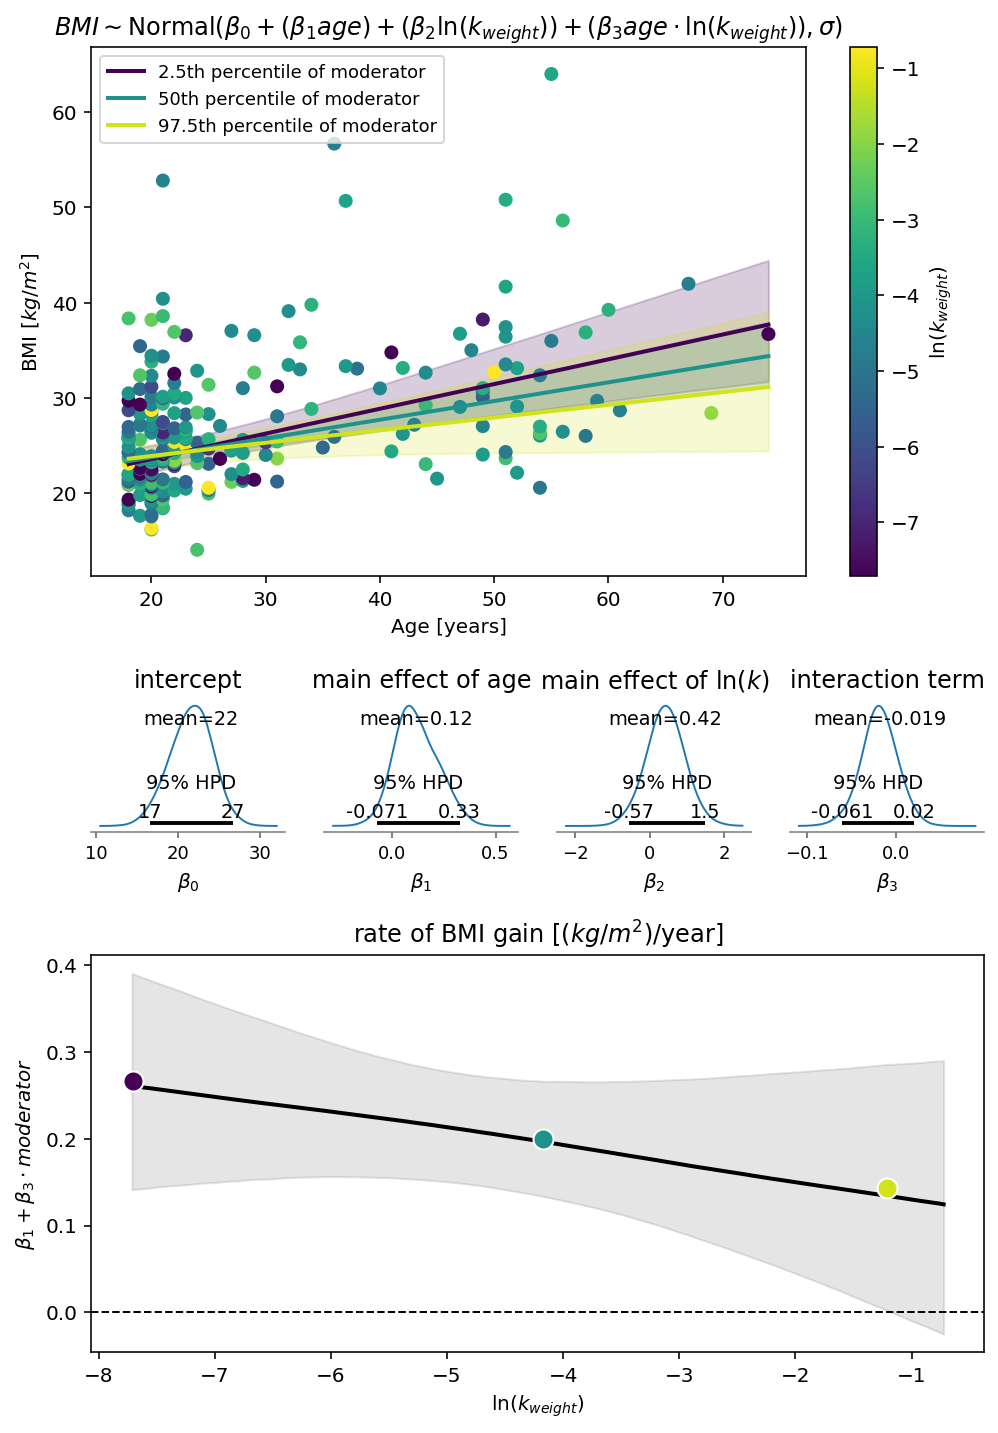

In [10]:
ax1, ax2, axb0, axb1, axb2, axb3 = bmi_age_weight1.plot_multipanel(
    figsize=figsize, moderation_multiplier=1
)

ax1.set(
    title=r"$BMI \sim \mathrm{Normal}(\beta_0 + (\beta_1 age) + (\beta_2 \ln(k_{weight})) + (\beta_3 age \cdot \ln(k_{weight})), \sigma)$"
)

ax2.set(title="rate of BMI gain [$(kg/m^2)$/year]")

plt.savefig("veillard_vincent_reanalysis_weight.pdf", bbox_inches="tight")
plt.savefig("veillard_vincent_reanalysis_weight.png", bbox_inches="tight", dpi=300)

Again, we get a radically different interpretation with this analysis, compared to Veillard & Vincent (2020). All $\beta$ coefficients are credibly non-zero, so we have evidence for main effects of age, discounting for weight loss, and their interaction.

So we can conclude that a) BMI increases with age, b) BMI increases as discount rate decreases, c) discount rates moderate the rate of BMI gain with age.

Again, this is evidence for the process model of Veillard & Vincent (2020) that people with higher levels of discounting will gain BMI with age, whereas those with the lowest level of discounting do not gain (much or any) weight with age.

# Veillard & Vincent (2020) data, but with truncation
The raw scores of the MCQ and WCQ from Veillard & Vincent (2020) included participants who fell outside of the sensitive range of both measures. The analysis above presents the results of analysing all of that data.

This section applies truncation to remove those with MCQ and WCQ scores at floor or ceiling.

[Text(0.5, 0, 'WCQ')]

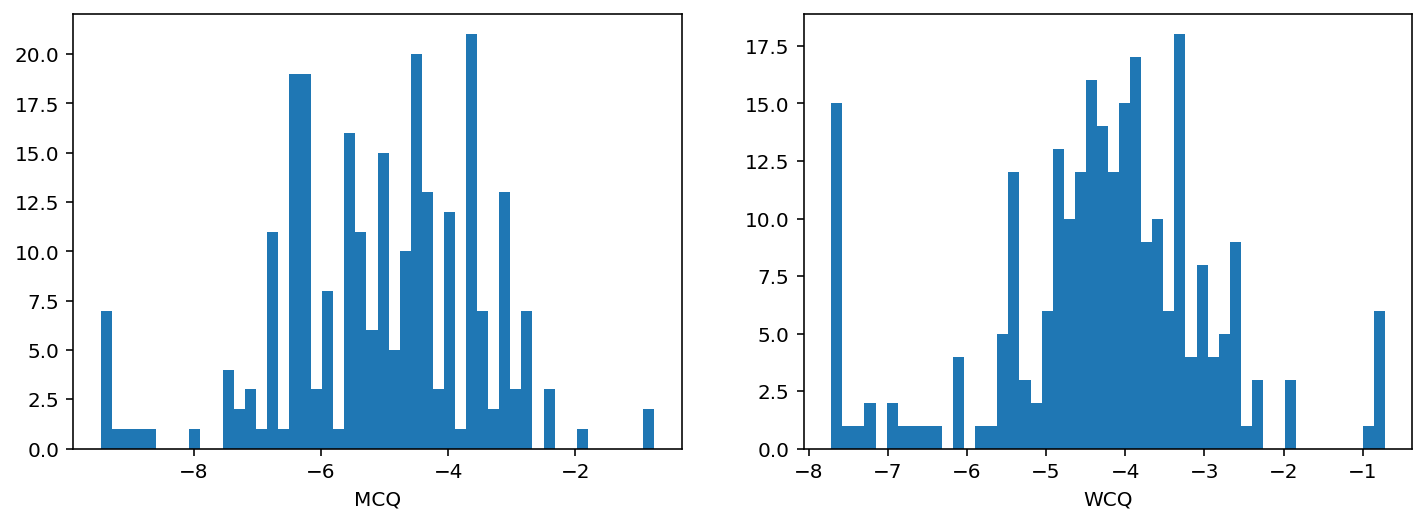

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].hist(data.logk_money.values, 50)
ax[0].set(xlabel="MCQ")

ax[1].hist(data.logk_weight.values, 50)
ax[1].set(xlabel="WCQ")

In [12]:
truncate = (data.logk_money < -8.5) | (data.logk_money > -1.5)

data.logk_money[truncate] = None

In [13]:
# using values for original WCQ (Lim & Bruce, 2015)
truncate = (data.logk_weight < -7) | (data.logk_weight > -1.5)
data.logk_weight[truncate] = None

[Text(0.5, 0, 'WCQ')]

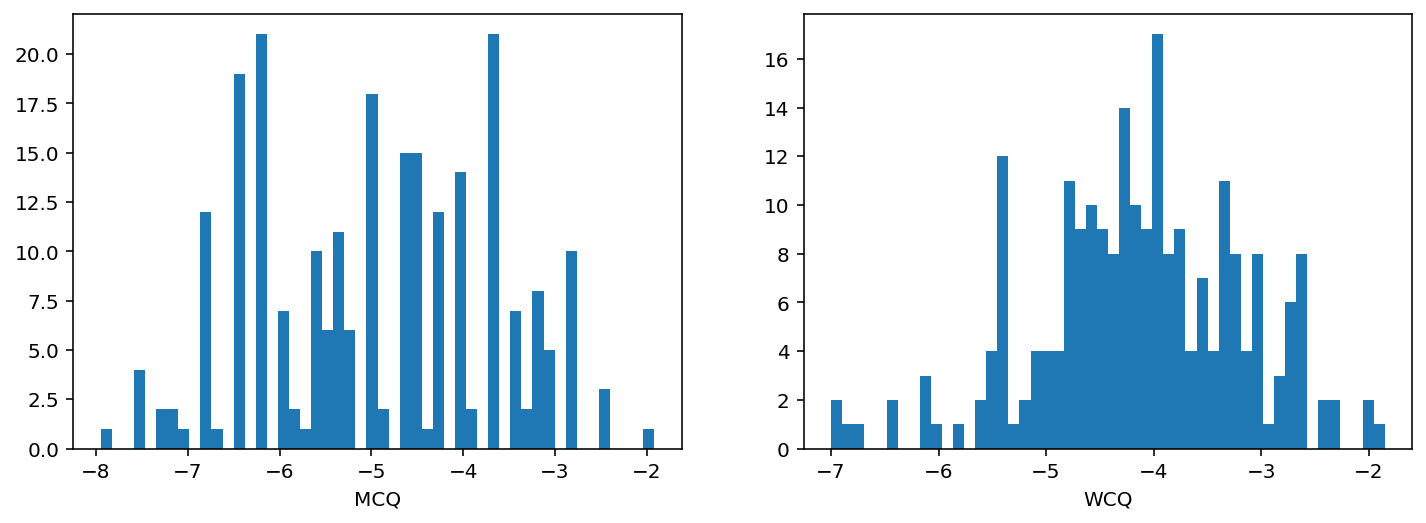

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].hist(data.logk_money, 50)
ax[0].set(xlabel="MCQ")

ax[1].hist(data.logk_weight, 50)
ax[1].set(xlabel="WCQ")

Now we proceed with the same analyses as above

## Analysis 1: `bmi ~ age + logk_money + age:logk_money`

In [15]:
# remove missing values
keep = ~np.isnan(data.logk_money.values)
y = data.bmi.values[keep]
x = data.age.values[keep]
m = data.logk_money.values[keep]

In [16]:
bmi_age_money2 = BayesianModeration(
    y=y,
    x=x,
    m=m,
    xlabel=r"Age [years]",
    ylabel="BMI [$kg/m^2$]",
    mlabel=r"$\ln(k_{money})$",
    prior=BMI_prior,
    sample_options=sample_options,
)

model = bmi_age_money2.model
trace = bmi_age_money2.trace

Prior parameters are:
{'β0μ': 12, 'β0σ': 20, 'β1μ': 0, 'β1σ': 20, 'β2μ': 0, 'β2σ': 20, 'β3μ': 0, 'β3σ': 20, 'σ': 1}


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (6 chains in 6 jobs)
NUTS: [σ, β3, β2, β1, β0]
Sampling 6 chains, 0 divergences: 100%|██████████| 42000/42000 [01:22<00:00, 511.50draws/s]
The number of effective samples is smaller than 25% for some parameters.


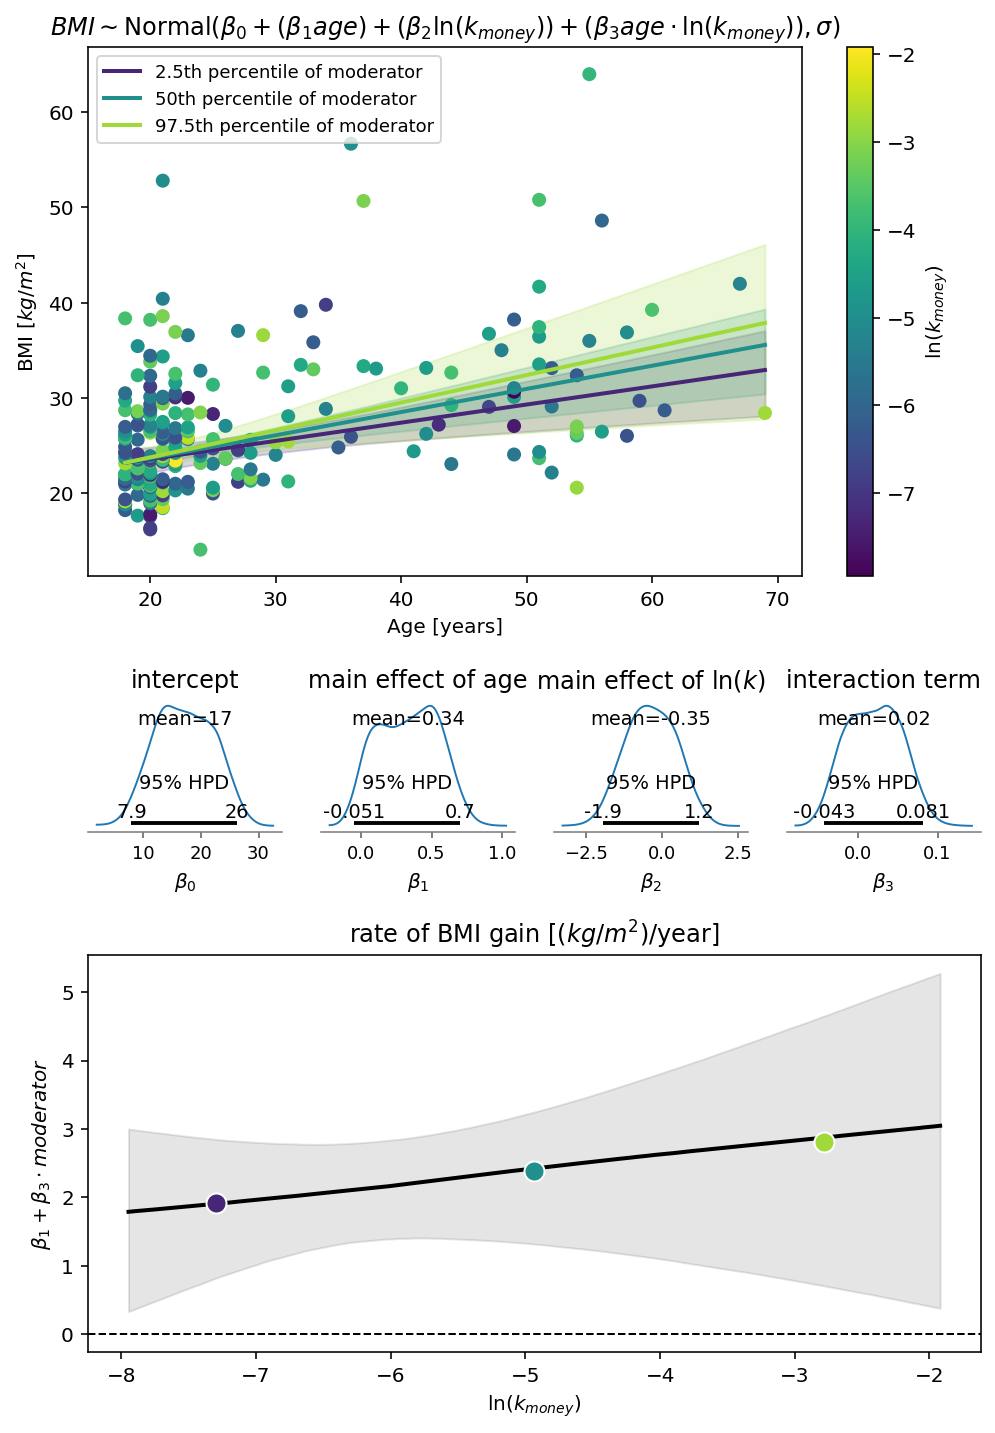

In [17]:
ax1, ax2, axb0, axb1, axb2, axb3 = bmi_age_money2.plot_multipanel(
    figsize=figsize, moderation_multiplier=10
)

ax1.set(
    title=r"$BMI \sim \mathrm{Normal}(\beta_0 + (\beta_1 age) + (\beta_2 \ln(k_{money})) + (\beta_3 age \cdot \ln(k_{money})), \sigma)$"
)

ax2.set(title="rate of BMI gain [$(kg/m^2)$/year]")

plt.savefig("veillard_vincent_reanalysis_truncated_money.pdf", bbox_inches="tight")
plt.savefig(
    "veillard_vincent_reanalysis_truncated_money.png", bbox_inches="tight", dpi=300
)

While the $\beta$ coefficients have now changed slightly from the same analysis with non-truncated data, the overall pattern of results has not changed. We still have main effect of age, discount rate, and an interaction between the two.

## Analysis 2: `bmi ~ age + logk_weight + age:logk_weight`

In [18]:
# remove missing values
keep = ~np.isnan(data.logk_weight.values)
y = data.bmi.values[keep]
x = data.age.values[keep]
m = data.logk_weight.values[keep]

In [19]:
# BMI_prior = {
#     "β0μ": 12,
#     "β0σ": 20,
#     "β1μ": 0,
#     "β1σ": 1,
#     "β2μ": 0,
#     "β2σ": 1,
#     "β3μ": 0,
#     "β3σ": 1,
#     "σ": 1,
# }

In [20]:
bmi_age_weight2 = BayesianModeration(
    y=y,
    x=x,
    m=m,
    xlabel=r"Age [years]",
    ylabel="BMI [$kg/m^2$]",
    mlabel=r"$\ln(k_{weight})$",
    prior=BMI_prior,
    sample_options=sample_options,
)

model = bmi_age_weight2.model
trace = bmi_age_weight2.trace

Prior parameters are:
{'β0μ': 12, 'β0σ': 20, 'β1μ': 0, 'β1σ': 20, 'β2μ': 0, 'β2σ': 20, 'β3μ': 0, 'β3σ': 20, 'σ': 1}


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (6 chains in 6 jobs)
NUTS: [σ, β3, β2, β1, β0]
Sampling 6 chains, 0 divergences: 100%|██████████| 42000/42000 [01:09<00:00, 604.28draws/s]
The number of effective samples is smaller than 25% for some parameters.


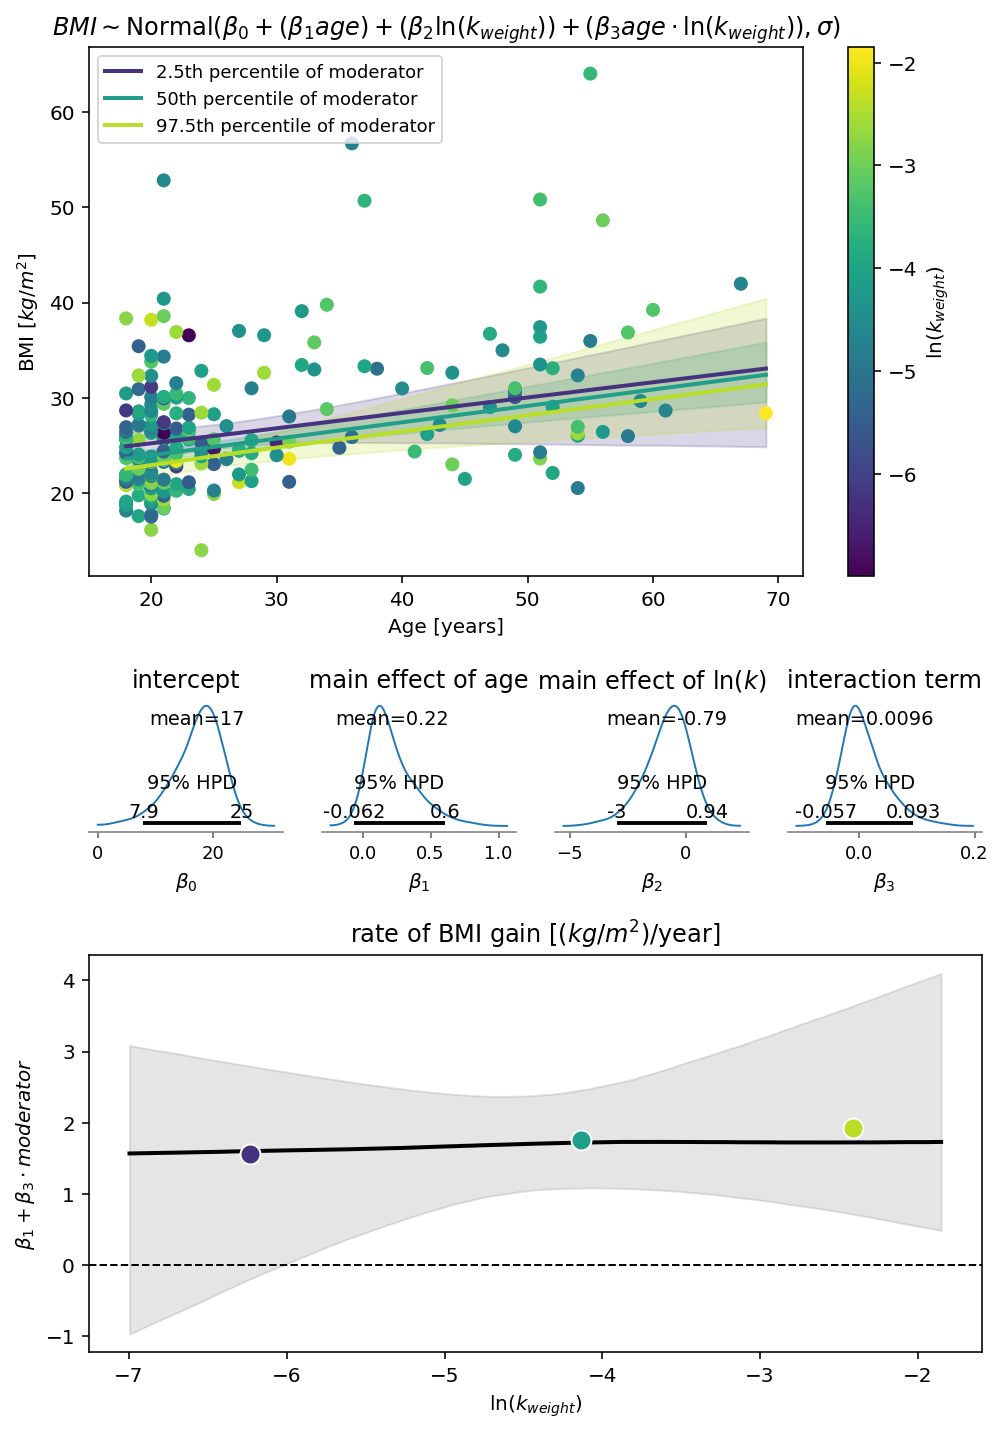

In [21]:
ax1, ax2, axb0, axb1, axb2, axb3 = bmi_age_weight2.plot_multipanel(
    figsize=figsize, moderation_multiplier=10
)

ax1.set(
    title=r"$BMI \sim \mathrm{Normal}(\beta_0 + (\beta_1 age) + (\beta_2 \ln(k_{weight})) + (\beta_3 age \cdot \ln(k_{weight})), \sigma)$"
)

ax2.set(title="rate of BMI gain [$(kg/m^2)$/year]")

plt.savefig("veillard_vincent_reanalysis_truncated_weight.pdf", bbox_inches="tight")
plt.savefig(
    "veillard_vincent_reanalysis_truncated_weight.png", bbox_inches="tight", dpi=300
)

While the $\beta$ coefficients have now changed slightly from the same analysis with non-truncated data, the overall pattern of results has not changed. We still have main effect of age, discount rate, and an interaction between the two.

# References

Lim, S.-L., & Bruce, A. S. (2015). Can’t wait to lose weight? Characterizing temporal discounting parameters for weight-loss. Appetite, 85(C), 8–13.

Veillard, M. L., & Vincent, B. T. (in press). Temporal discounting does not influence Body Mass Index. Physiology & Behavior. https://doi.org/10.31234/osf.io/dz4em